In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import nltk

In [ ]:
import kagglehub
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

In [ ]:
print(path)

/kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
!ls /kaggle/input/imdb-dataset-of-50k-movie-reviews

'IMDB Dataset.csv'


In [ ]:
file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'

df = pd.read_csv(file_path)

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.query('sentiment == \'positive\'').shape

(25000, 2)

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
df['encoded_senti'] = 0

In [ ]:
df.loc[df['sentiment'] == 'positive', 'encoded_senti'] = 1

In [ ]:
df['encoded_senti'].value_counts()

,count
encoded_senti,
1,25000
0,25000


In [ ]:
## test/train split
X_train, X_test, y_train, y_test = train_test_split(df['review'].values, df['encoded_senti'].values, test_size = 0.2, random_state = 42)

In [ ]:
X_test.shape

(10000,)

In [ ]:
train_data, test_data = train_test_split(df[['review', 'encoded_senti']], test_size = 0.2, random_state = 42)

In [ ]:
train_data

,review,encoded_senti
39087,That's what I kept asking myself during the ma...,0
30893,I did not watch the entire movie. I could not ...,0
45278,A touching love story reminiscent of In the M...,1
16398,This latter-day Fulci schlocker is a totally a...,0
13653,"First of all, I firmly believe that Norwegian ...",0
...,...,...
11284,`Shadow Magic' recaptures the joy and amazemen...,1
44732,I found this movie to be quite enjoyable and f...,1
38158,Avoid this one! It is a terrible movie. So wha...,0
860,This production was quite a surprise for me. I...,1


In [ ]:
from nltk.tokenize import WordPunctTokenizer

In [ ]:
tokenizer = WordPunctTokenizer()

In [ ]:
'hi'

'hi'

In [ ]:
word_dict = dict()

In [ ]:
tokenized_texts = []

In [ ]:
for i, sent in enumerate(train_data['review']):
  print(i)
  # print(sent.lower())
  t = tokenizer.tokenize(sent.lower())
  tokenized_texts.append(t)
  for w in t:
    try:
      word_dict[w] += 1
    except:
      word_dict[w] = 1

In [ ]:
x = list(word_dict.items())

In [ ]:
x.sort(key = lambda x: x[1], reverse = True)

In [ ]:
x_new = list(filter(lambda y: y[0][0] <= 'z' and y[0][0] >= 'a',x ))[:5000]

In [ ]:
vocab = list(dict(x_new).keys())

In [ ]:
word_to_index = {'<unk>': 0}

In [ ]:
for idx, token in enumerate(vocab[::-1], start = 1):
  word_to_index[token] = idx

In [ ]:
embeddings = []

In [ ]:
tokenized_texts[2]

['a',
 'touching',
 'love',
 'story',
 'reminiscent',
 'of',
 '\x91',
 'in',
 'the',
 'mood',
 'for',
 'love',
 "'.",
 'drawing',
 'heavily',
 'on',
 'chinese',
 'poetry',
 'and',
 'how',
 'this',
 'is',
 'used',
 'by',
 'eastern',
 'people',
 'to',
 'communicate',
 'feelings',
 'to',
 'each',
 'other',
 ',',
 'the',
 'story',
 'focuses',
 'on',
 'a',
 'schoolteacher',
 'who',
 'wants',
 'so',
 'much',
 'to',
 'be',
 'a',
 'model',
 'teacher',
 'as',
 'well',
 'as',
 'a',
 'good',
 'husband',
 'and',
 'father',
 '.',
 'a',
 'senior',
 'student',
 'is',
 'very',
 'attracted',
 'to',
 'him',
 '.',
 'as',
 'the',
 'story',
 'unfolds',
 'we',
 'see',
 'the',
 'emotions',
 'below',
 'the',
 'surface',
 'in',
 'his',
 '20',
 'year',
 'marriage',
 'and',
 'how',
 'he',
 'grapples',
 'with',
 'the',
 'moral',
 'dilemmas',
 'that',
 'face',
 'him',
 '.',
 'a',
 'beautiful',
 'and',
 'moving',
 'story',
 '.']

In [ ]:
[word_to_index[tok] if tok in vocab else 0 for tok in tokenized_texts[2]]

In [ ]:
for i in range(len(tokenized_texts)):
  if i % 100 == 0:
    print(i)
  sent_tok = tokenized_texts[i]
  embeddings.append([word_to_index[tok] if tok in vocab else 0 for tok in sent_tok])

In [ ]:
embeddings_copy = embeddings.copy()

In [ ]:
len(embeddings)

40000

In [ ]:
emb_padded = []

In [ ]:
for i, emb in enumerate(embeddings):
  if emb is None:
    raise Exception(f'Issue on {i}')
  # print(i, emb)
  if(len(emb) < 200):
    x = [5001 for j in range(200 - len(emb))]
    emb_padded.append(emb.extend(x))
  elif len(emb) >= 200:
    emb_padded.append(emb[:200])

In [ ]:
import torch

In [ ]:
X_train_tensor = torch.tensor(emb_padded)

In [ ]:
X_train_tensor.shape

torch.Size([40000, 200])

In [ ]:
class lstm(nn.Module):

  def __init__(self, X, y):
    super().__init__()
    self.features = X
    self.labels = y
    self.emb_layer =  nn.Embedding(5002, 128, padding_idx= 5001)
    self.lstm_layer = nn.LSTM(128, 32, dropout=0.2, batch_first = True)
    self.lin = nn.Linear(32, 1)
    self.sig_layer = nn.Sigmoid()


  def forward(self, X):
    out = self.emb_layer(X)
    # print(out.shape)
    out = self.lstm_layer(out)
    out = self.lin(out[1][1])
    out = nn.functional.sigmoid(out)
    return out


In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [ ]:
dataset = CustomDataset(X_train_tensor, torch.tensor(y_train))

In [ ]:
dl = DataLoader(dataset, batch_size = 30, shuffle = True)

In [ ]:
len(y_train)

40000

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
model = lstm(X_train_tensor, torch.tensor(y_train)).to(device)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


In [ ]:
# model.lstm_layer(model.emb_layer(X_train_tensor[0:32]))[1][0].shape

In [ ]:
epochs = 10
lr = 0.01

In [ ]:
loss_func = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [ ]:
for epoch in range(epochs):
  avg_loss = 0
  for x, y in dl:
    # print(x)
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    # print(x.shape)
    out = model(x)
    # print(out.shape)
    # print(y.shape)
    loss = loss_func(out.reshape(-1).to(dtype = torch.float64), y.to(torch.float64))
    loss.backward()
    avg_loss += loss
    optimizer.step()
    # print(avg_loss)
  print(f'Epoch: {epoch + 1}, Loss: {avg_loss/40000}')

Epoch: 1, Loss: 0.02305776905749642
Epoch: 2, Loss: 0.01910833048139114
Epoch: 3, Loss: 0.017531557319783574
Epoch: 4, Loss: 0.016656267774440854
Epoch: 5, Loss: 0.014683320991576454
Epoch: 6, Loss: 0.01268045646732556
Epoch: 7, Loss: 0.011916965900528709
Epoch: 8, Loss: 0.01134680230650378
Epoch: 9, Loss: 0.011103062873369022
Epoch: 10, Loss: 0.010658865302262616


In [ ]:
dataset[3][1]

tensor(0)

In [ ]:
model.forward(dataset[3][0].to(device))

tensor([[0.4019]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
r = test_data.iloc[100]['review']

In [ ]:
r

'I loved this movie! I\'m shocked and disappointed that it never made it to the theaters. Every story was better than the last..much better than the much hyped "Scream" series and "I Know What You Did Last Summer"and way better than the terrible "Urban Legend". I\'d recommend this film to every horror fan.'

In [ ]:
tokenized_r = tokenizer.tokenize(r)

In [ ]:
import numpy as np

In [ ]:
l = np.array([word_to_index[tok] if tok in vocab else 0 for tok in tokenized_r])
if len(l) < 200:
  padding_length = 200 - len(l)
  l = np.pad(l, (0, padding_length), mode = 'constant', constant_values=5001)
  l = torch.from_numpy(l)
else:
  l = torch.from_numpy(l[:200])

In [ ]:
model(l.to(device))

tensor([[0.4098]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
len(l)

In [ ]:
len(dataset)

In [ ]:
test_data

,review,encoded_senti
33553,I really liked this Summerslam due to the look...,1
9427,Not many television shows appeal to quite as m...,1
199,The film quickly gets to a major chase scene w...,0
12447,Jane Austen would definitely approve of this o...,1
39489,Expectations were somewhat high for me when I ...,0
...,...,...
28567,Although Casper van Dien and Michael Rooker ar...,0
25079,I liked this movie. I wasn't really sure what ...,1
18707,Yes non-Singaporean's can't see what's the big...,1
15200,"As far as films go, this is likable enough. En...",0


In [ ]:
dataset[25000][1]

In [ ]:
pred = 0

In [74]:
r

'I loved this movie! I\'m shocked and disappointed that it never made it to the theaters. Every story was better than the last..much better than the much hyped "Scream" series and "I Know What You Did Last Summer"and way better than the terrible "Urban Legend". I\'d recommend this film to every horror fan.'

In [75]:
test_data

,review,encoded_senti
33553,I really liked this Summerslam due to the look...,1
9427,Not many television shows appeal to quite as m...,1
199,The film quickly gets to a major chase scene w...,0
12447,Jane Austen would definitely approve of this o...,1
39489,Expectations were somewhat high for me when I ...,0
...,...,...
28567,Although Casper van Dien and Michael Rooker ar...,0
25079,I liked this movie. I wasn't really sure what ...,1
18707,Yes non-Singaporean's can't see what's the big...,1
15200,"As far as films go, this is likable enough. En...",0


In [158]:
corr = 0
preds = []

In [159]:
import tqdm

In [160]:
model.eval()

lstm(
  (emb_layer): Embedding(5002, 128, padding_idx=5001)
  (lstm_layer): LSTM(128, 32, batch_first=True, dropout=0.2)
  (lin): Linear(in_features=32, out_features=1, bias=True)
  (sig_layer): Sigmoid()
)

In [161]:
with torch.no_grad():
  for rev in tqdm.tqdm(test_data.values):
    # print(rev)
    l = rev[0]
    tokenized_r = tokenizer.tokenize(l)
    l = np.array([word_to_index[tok] if tok in vocab else 0 for tok in tokenized_r])
    if len(l) < 200:
      padding_length = 200 - len(l)
      l = np.pad(l, (0, padding_length), mode = 'constant', constant_values=5001)
      l = torch.from_numpy(l)
    else:
      l = torch.from_numpy(l[:200])
    label = rev[1]
    pred = model(l.to(device)).cpu()
    pred = pred[0][0]
    preds.append(pred)
    if (label == 1 and pred > 0.5) or (pred < 0.5 and label == 0):
      corr += 1

100%|██████████| 10000/10000 [01:24<00:00, 118.22it/s]


In [162]:
corr

8029

In [163]:
test_res = test_data.copy()

In [164]:
pred

tensor(0.8219)

In [165]:
test_res['predictions'] = np.nan

In [ ]:
preds

In [167]:
len(preds)

10000

In [168]:
preds[0].item()

0.601172924041748

In [183]:
test_res['predictions'] = [p.item() for p in preds]

In [184]:
test_res['prob_good'] = test_res['predictions']

In [185]:
test_res.loc[test_res['prob_good'] > 0.5, 'predictions'] = 1
test_res.loc[test_res['prob_good'] < 0.5 ,'predictions'] = 0

In [186]:
test_res

,review,encoded_senti,predictions,prob_good
33553,I really liked this Summerslam due to the look...,1,1.0,0.601173
9427,Not many television shows appeal to quite as m...,1,1.0,0.790560
199,The film quickly gets to a major chase scene w...,0,0.0,0.110392
12447,Jane Austen would definitely approve of this o...,1,0.0,0.376104
39489,Expectations were somewhat high for me when I ...,0,1.0,0.812710
...,...,...,...,...
28567,Although Casper van Dien and Michael Rooker ar...,0,0.0,0.000483
25079,I liked this movie. I wasn't really sure what ...,1,1.0,0.858952
18707,Yes non-Singaporean's can't see what's the big...,1,1.0,0.960987
15200,"As far as films go, this is likable enough. En...",0,0.0,0.065258


In [104]:
preds[0].cpu()

tensor([[0.4098]], grad_fn=<ToCopyBackward0>)

In [187]:
y_true = test_res['encoded_senti']
y_pred = test_res['predictions'].values.astype(int)

              precision    recall  f1-score   support

           0     0.8020    0.8002    0.8011      4961
           1     0.8038    0.8055    0.8046      5039

    accuracy                         0.8029     10000
   macro avg     0.8029    0.8029    0.8029     10000
weighted avg     0.8029    0.8029    0.8029     10000



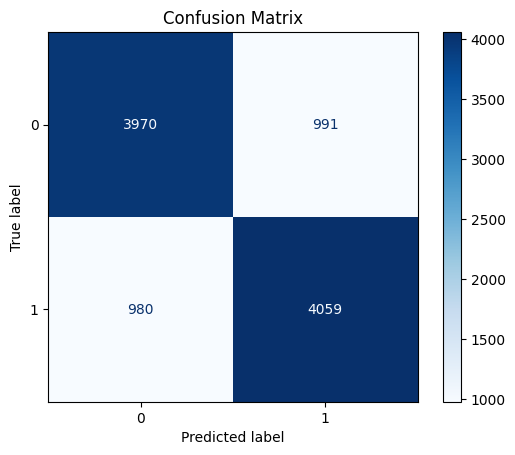

In [188]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, digits=4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    PrecisionRecallDisplay
)

In [190]:
y_prob = test_res['prob_good']

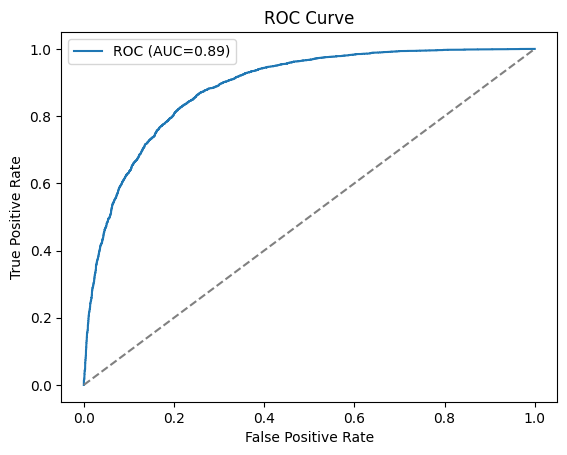

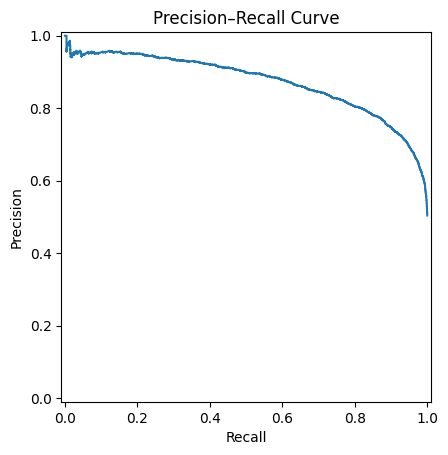

ROC AUC: 0.89


In [191]:
roc_auc = roc_auc_score(y_true, y_prob)
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_display = PrecisionRecallDisplay(precision=prec, recall=rec)
pr_display.plot()
plt.title("Precision–Recall Curve")
plt.show()

print(f"ROC AUC: {roc_auc:.2f}")
